In [1]:
%matplotlib inline
from scipy import *
from scipy import integrate

import matplotlib

import numpy as np
import matplotlib.pyplot as plt

from scipy.special import ellipk # Elliptic integral
from scipy.special import iv # Modified Bessel function of the first kind of real order I_0
from scipy.special import kn # Modified Bessel function of the second kind of integer order n K_0

In [2]:
result = []
with open('Q_factor.csv','r') as f:
    for line in f:
        result.append(map(float,line.split(',')))
        print line
power = [0]*14 
P = [0]*14
Q_i = [0]*14
Q_c = [0]*14
Q_r = [0]*14
r = [0]*14
for i in range(0,14):
    P[i] = 10**((result[i][0]-30)/10)
    Q_i[i] = result[i][1]
    Q_c[i] = result[i][2]
    Q_r[i] = result[i][3]
    power[i] = result[i][0]
    r[i] = Q_r[i] / Q_c[i] /2
    print power[i],r[i]

-70.000000,27923.399947,72234.219454,20138.507802

-75.000000,41808.848138,80370.321005,27502.155803

-80.000000,65563.048640,85618.531582,37130.263768

-85.000000,96446.080919,89545.170598,46433.801047

-90.000000,111538.614799,89308.891660,49596.782358

-95.000000,109751.801079,89715.431263,49363.647603

-100.000000,104573.950195,89254.334782,48154.366951

-105.000000,100521.267862,88331.792545,47016.573414

-110.000000,96762.571229,86945.065543,45795.745051

-115.000000,99664.477436,86913.614340,46426.672461

-120.000000,91727.515414,90925.244632,45662.309052

-125.000000,89483.348038,78751.299811,41887.506881

-130.000000,87068.693585,88975.864566,44005.974224

-135.000000,83279.024260,84350.896736,41905.766786

-70.0 0.139397282578
-75.0 0.171096466078
-80.0 0.216835439022
-85.0 0.259275853387
-90.0 0.277669901821
-95.0 0.275112357529
-100.0 0.269759261937
-105.0 0.26613618981
-110.0 0.263360230768
-115.0 0.267085155839
-120.0 0.251098081929
-125.0 0.265948035026
-130.0 0.24729163

In [9]:
k_B = 1.3806488*10**(-23)
noise_T = 6
radius = 0.2
power_dBm = -80
power_W = 10**((power_dBm-30)/10.)
naa = k_B * noise_T /radius**2 /power_W
print np.log10(naa)*10

-96.8382552118


In [3]:
#####################################################
#
# Environment part          !!!!!NOW = Sputtering Al
#
#####################################################
global h_bar
global k_B
global mu_0
global epsilon_0
global T
global T_c
h_bar = 1.05457173*10**(-34)      # 1.05457173 × 10-34 m^2 kg / s   6.58211928(15)×10−16 eV·s
k_B = 1.3806488*10**(-23)         # 1.3806488×10−23 J|K-1  8.6173324×10-5 eV|K−1 
mu_0 = 4*pi*10**(-7)              # 4*pi*10**(-7)  1.25663706
epsilon_0 = 8.854187817*10**(-12) # 8.854187817*10**(-12)
T = 0.1                           # Kelvin
T_c = 1.2                      # Kelvin

Rho_c = 1.4 * 10**(-8)            # (Ohm m) MBE(0.1*10^-8) Sputtering(2*10^-8)
Rho_g = 1.4 * 10**(-8)            # (Ohm m) MBE(0.1*10^-8) Sputtering(2*10^-8)
global sigma_cn
global sigma_gn
global delta_0
sigma_cn = 1/Rho_c                # Normal state metal conductivity Al_bulk=3.56*10**7 (S/m)
sigma_gn = 1/Rho_g                # Normal state metal conductivity Al_bulk=3.56*10**7 (S/m)
delta_0 = 3.0121*10**(-23)#1.674*k_B * T_c #+ 0*1j        # Calculation of delta_0 from Tc relation of BCS (eV)
T_C = 50 *10**(-9)
T_G = 50 *10**(-9)

#delta_T = 177.0*10**(-6)          # Al (eV)

global epsilon
global CPW_C
global CPW_G
global ditangent
epsilon = 11.9                    # Dielectronic paramter of material
CPW_C = 3.0 *10**(-6)             # Width of CPW central trace (m)
CPW_G = 2.0 *10**(-6)             # Width of CPW gap (m)
ditangent = 0.005
dithickness = 400.0*10**(-6)

# Elliptic integral part
global k
global K_k
global k_prime
global K_k_prime
k = CPW_C / (CPW_C+CPW_G*2)       # CPW k parameter
k_1 = np.sinh(pi*CPW_C/4/dithickness)/np.sinh(pi*(CPW_C+2*CPW_G)/4/dithickness)
k_prime = np.sqrt(1-k*k)          # CPW k_prime parameter
k_1_prime = np.sqrt(1-k_1*k_1) 
K_k = ellipk(k*k)                 # The definition of elliptic integral function is different. In scipy it is m number, but here is modulus k
K_k_prime = ellipk(k_prime*k_prime)
K_k_1 = ellipk(k_1*k_1)
K_k_1_prime = ellipk(k_1_prime*k_1_prime)

print delta_0

3.0121e-23


In [4]:
freq_r = 4.66 * 10**9 ## GHz
length = 299792458.0 / 4.0 / freq_r *np.sqrt(2/(1+epsilon)) ## Mazin DT p41
CPW_C = 3 * 10**(-6) ## 3um
thickness = T_C##50*10**(-9)##Thickness ## 50nm
area = T_C * CPW_C
volume = area * length

L_g = mu_0*K_k_prime/K_k/4.0 # Geometric inductance, 

freq = range(10,10001)
sigma_N = sigma_cn

N_0 = 1.72*10**10 * 10**18 / (1.6*10**(-19)) ## Visser DT p116
n_qp = 2 * N_0 *np.sqrt(2*pi*k_B*T*delta_0)*e**(-delta_0/k_B/T) ## Visser DT p16
N_qp = n_qp * volume ## Visser DT p16
tau_0 = 440 * 10**(-9) ## 440ns, Barends DT p23
tau_qp = tau_0 / n_qp * N_0 *(k_B*T_c)**3/2/delta_0**2 ## Visser DT p25

omega = 2.0*pi*freq_r
g_c = 1.0/(4.0*CPW_C*(1.0-k*k)*(K_k**2.0))*(pi+np.log(4.0*pi*CPW_C/T_C)-k*np.log((1.0+k)/(1.0-k)))
g_g = k/(4.0*CPW_C*(1.0-k*k)*(K_k**2.0))*(pi+np.log(4.0*pi*(CPW_C+2*CPW_G)/T_G)-(1.0/k)*np.log((1.0+k)/(1.0-k)))
print L_g
##print g_c,k,k_prime
print n_qp, N_qp, volume

4.36764389474e-07
1.16464991052e+15 1.10632211608 9.49918173774e-16


4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
4.09999260203e-09 30.6261125959
1.62075272623e-07 3.32916775384e-13 3.32916775384e-13
0.270648861258
0.720712426136


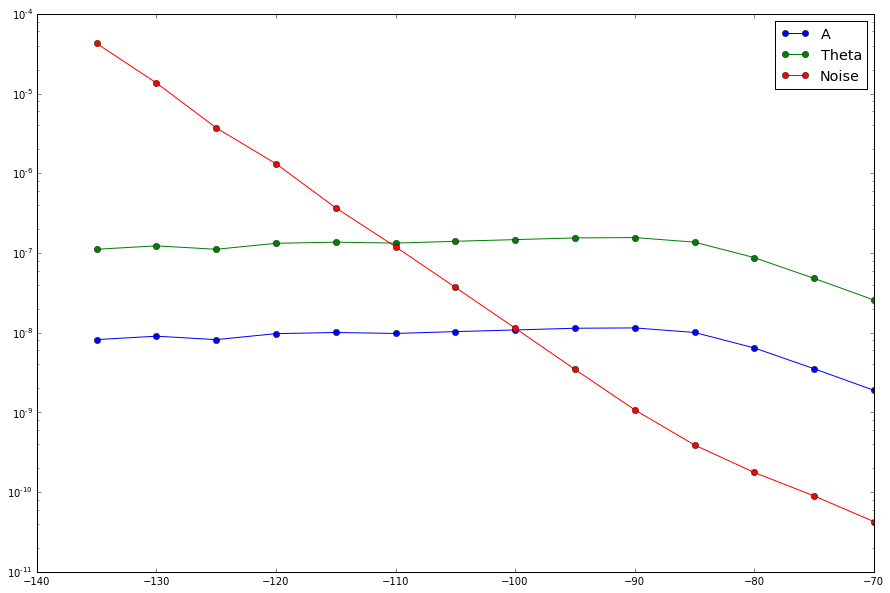

In [6]:
A = [0]*14
B = [0]*14
C = [0]*14
dAdnqp = [0]*14
dthetadnqp = [0]*14

def f(E):
    if E/k_B/T > 709:
        return 0
    else:
        return 1.0/(np.exp(E/(k_B *T)) + 1.0)
def g1(E):
    return (E**2 + delta_0**2 + h_bar*omega*E) / ((E**2-delta_0**2)**0.5*((E+h_bar*omega)**2-delta_0**2)**0.5)
def g1_1(E):
    if h_bar*omega > 2*delta_0:
        return (E**2 + delta_0**2 + h_bar*omega*E) / ((E**2-delta_0**2)**0.5*((E+h_bar*omega)**2-delta_0**2)**0.5)
    else:
        return 0
def g2(E):
    return (E**2 + delta_0**2 + h_bar*omega*E) / ((delta_0**2-E**2)**0.5*((E+h_bar*omega)**2-delta_0**2)**0.5)

for i in range(0,14):
    
    sigma_1_1i = lambda E: (2.0/h_bar/omega) * (f(E)-f(E+h_bar*omega)) * g1(E)
    sigma_1_2i = lambda E: (1.0/h_bar/omega) * (1.0-2.0*f(E+h_bar*omega)) * g1_1(E)
    sigma_1_1, error11 = integrate.quad(sigma_1_1i, delta_0, 656*k_B*T)
    sigma_1_2, error12 = integrate.quad(sigma_1_2i, min(delta_0-h_bar*omega, -delta_0), -delta_0)
    sigma_1 = sigma_1_1 - sigma_1_2
    sigma_2i = lambda E: (1.0/h_bar/omega) * (1.0-2.0*f(E+h_bar*omega)) * g2(E)
    sigma_2, error2 =  integrate.quad(sigma_2i, max(delta_0-h_bar*omega, -delta_0), delta_0)
    
    sigma_sc = (sigma_1 - sigma_2*1j)*sigma_cn
    sigma_sg = (sigma_1 - sigma_2*1j)*sigma_gn
    print sigma_1, sigma_2
    Z_sc = np.sqrt(mu_0*omega*1j/sigma_sc)*1.0/np.tanh(T_C * np.sqrt(1j*mu_0*omega*sigma_sc))
    Z_sg = np.sqrt(mu_0*omega*1j/sigma_sg)*1.0/np.tanh(T_G * np.sqrt(1j*mu_0*omega*sigma_sg))
    
    modulus_sigma = np.sqrt(sigma_1**2 + sigma_2**2) * sigma_N
    
    dsigma1dnqp = sigma_N / N_0 / h_bar / omega * np.sqrt(2.0*delta_0/pi/k_B/T)*(kn(0, h_bar*omega/2.0/k_B/T)) * np.sinh(h_bar*omega/2.0/k_B/T)
    dsigma2dnqp = sigma_N / N_0 / h_bar / omega / 2.0 *(-1*pi) * (1.0 + 2.0*np.sqrt(2.0*delta_0/pi/k_B/T)*(e**(-h_bar*omega/2.0/k_B/T)) * (iv(0, h_bar*omega/2.0/k_B/T)))
    
    mplambda = 1 / np.sqrt(mu_0 * omega*sigma_2) ## Barends DT p40
    beta = 1 + (2*T_C/mplambda)/np.sinh(2*T_C/mplambda) ## Barends DT p41
    L_sc = Z_sc.imag/omega
    L_sg = Z_sg.imag/omega
    L_k = g_c*L_sc + g_g*L_sg
    
    alpha = L_k / (L_k + L_g)
    dAdnqp[i] = -alpha*beta*Q_r[i]/modulus_sigma/volume * dsigma1dnqp
    dthetadnqp[i] = -alpha*beta*Q_r[i]/modulus_sigma/volume * dsigma2dnqp
    A[i] = 4 * N_qp * tau_qp *(dAdnqp[i])**2
    B[i] = 4 * N_qp * tau_qp *(dthetadnqp[i])**2
    C[i] = k_B * 6 /r[i]**2 /P[i]
plt.figure(figsize=(15,10))
plt.plot(power, A,'o-',label='A')
plt.plot(power, B,'o-',label='Theta')
plt.plot(power, C,'o-',label='Noise')
plt.yscale("log")
legend = plt.legend(loc='upper right', shadow=False, fontsize='x-large')
print L_k,L_sc,L_sg
print alpha
print g_c*L_sc/(g_c*L_sc + g_g*L_sg)

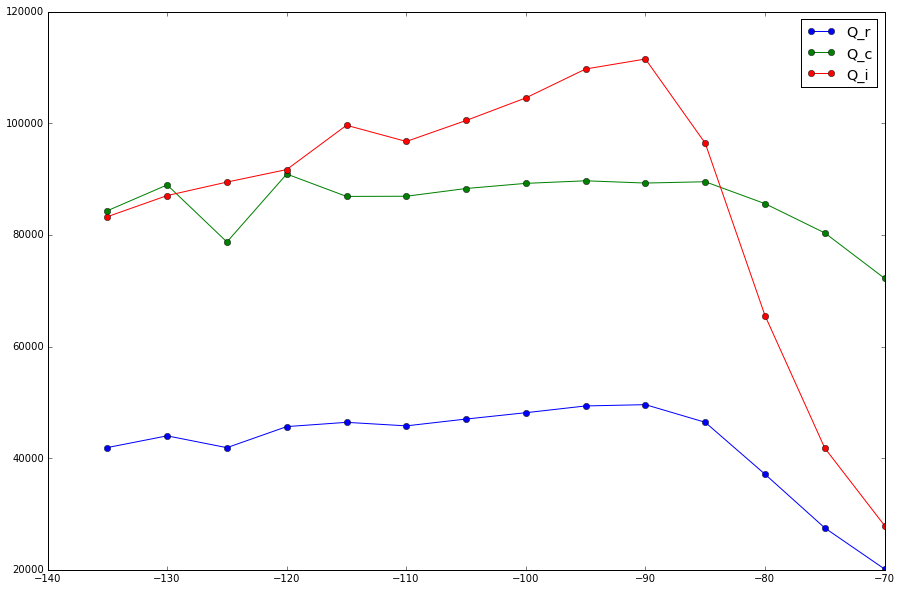

In [7]:
plt.figure(figsize=(15,10))
plt.plot(power, Q_r,'o-',label='Q_r')
plt.plot(power, Q_c,'o-',label='Q_c')
plt.plot(power, Q_i,'o-',label='Q_i')
legend = plt.legend(loc='upper right', shadow=False, fontsize='x-large')

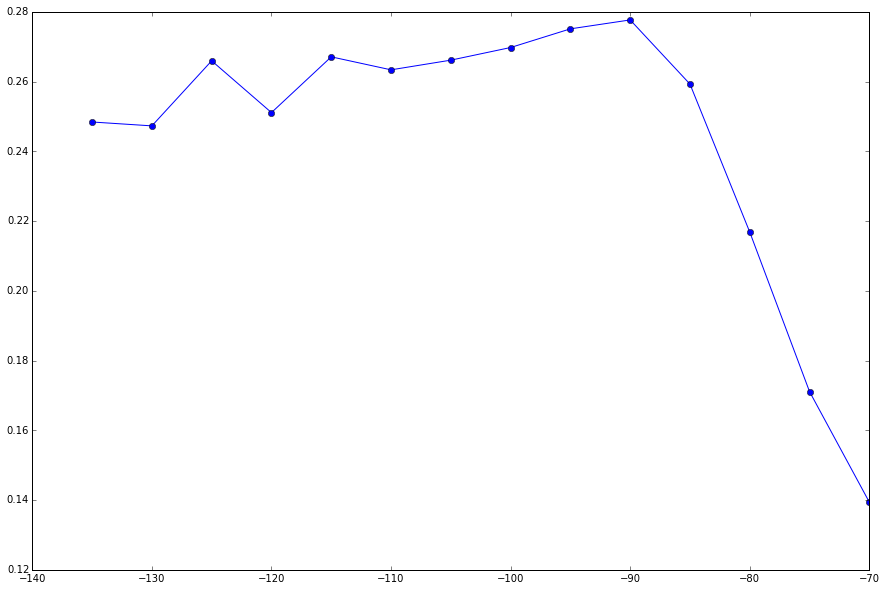

In [8]:
plt.figure(figsize=(15,10))
plt.plot(power, r,'o-',label='r')

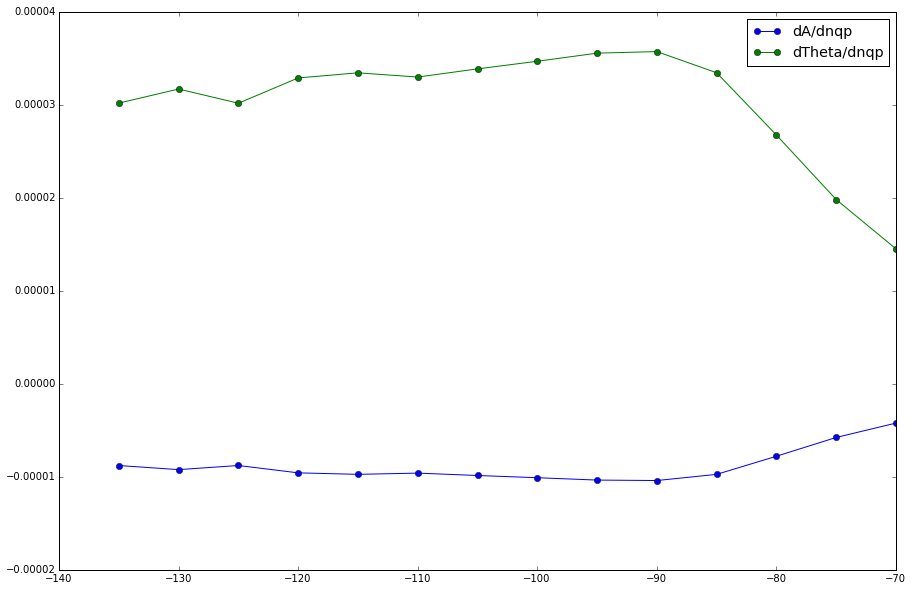

In [17]:
plt.figure(figsize=(15,10))
plt.plot(power, dAdnqp,'o-',label='dA/dnqp')
plt.plot(power, dthetadnqp,'o-',label='dTheta/dnqp')
legend = plt.legend(loc='upper right', shadow=False, fontsize='x-large')

In [17]:
print 